<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ резюме из HeadHunter
   

In [382]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy import stats

# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [383]:
#ваш код здесь
df = pd.read_csv('dst-3.0_16_1_hh_database.csv', delimiter=';')

2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [384]:
#ваш код здесь
df.tail(3)

Пол, возраст           ЗП  \
44741  Женщина ,  48 лет , родилась 26 декабря 1970   40000 руб.   
44742   Мужчина ,  24 года , родился 6 октября 1994   20000 руб.   
44743    Мужчина ,  38 лет , родился 25 апреля 1980  120000 руб.   

        Ищет работу на должность:  \
44741  Аналитик данных, Математик   
44742            Контент-менеджер   
44743        Руководитель проекта   

                            Город, переезд, командировки  \
44741  Челябинск , готова к переезду , готова к редки...   
44742  Тамбов , не готов к переезду , не готов к кома...   
44743  Москва , не готов к переезду , не готов к кома...   

                                   Занятость                         График  \
44741                       полная занятость  полный день, удаленная работа   
44742  частичная занятость, полная занятость               удаленная работа   
44743                       полная занятость                    полный день   

                                             Опыт работы  \
44741  Опыт работы 21 год 5 месяцев  Январь 1998 — по...   
44742  Опыт работы 3 года 10 месяцев  Контент-менедже...   
44743  Опыт работы 15 лет 10 месяцев  Руководитель пр...   

                         Последнее/нынешнее место работы  \
44741  ОАО «ЧМК», Исследовательско-Технологический Це...   
44742                                          IQ-Maxima   
44743                                  ПАО ГК ТНС энерго   

                    Последняя/нынешняя должность  \
44741                 Начальник группы аналитики   
44742                          Менеджер проектов   
44743  Руководитель отдела технической поддержки   

                                       Образование и ВУЗ Обновление резюме  \
44741  Высшее образование 2000  Южно-Уральский госуда...  09.04.2019 05:07   
44742  Высшее образование 2015  Тамбовский государств...  26.04.2019 14:25   
44743  Высшее образование 1997  Южно-Российский госуд...  05.07.2018 20:15   

                                 Авто  
44741                      Не указано  
44742  Имеется собственный автомобиль  
44743                      Не указано

3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

In [385]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

4. Обратите внимание на информацию о числе непустых значений.

In [386]:
#ваш код здесь
print("Столбцы без пропусков:")
for column in df.columns[df.notnull().all()].tolist():
    print(column)

Столбцы без пропусков:
Пол, возраст
ЗП
Ищет работу на должность:
Город, переезд, командировки
Занятость
График
Образование и ВУЗ
Обновление резюме
Авто


5. Выведите основную статистическую информацию о столбцах.


In [387]:
#ваш код здесь
df.describe(include='all')

Пол, возраст          ЗП  \
count                                           44744       44744   
unique                                          16003         690   
top     Мужчина ,  32 года , родился 17 сентября 1986  50000 руб.   
freq                                               18        4064   

       Ищет работу на должность:  \
count                      44744   
unique                     14929   
top      Системный администратор   
freq                        3099   

                             Город, переезд, командировки         Занятость  \
count                                               44744             44744   
unique                                              10063                38   
top     Москва , не готов к переезду , не готов к кома...  полная занятость   
freq                                                 1261             30026   

             График                                        Опыт работы  \
count         44744                                              44576   
unique           47                                              44413   
top     полный день  Опыт работы 10 лет 8 месяцев  Апрель 2018 — по...   
freq          22727                                                  3   

                          Последнее/нынешнее место работы  \
count                                               44743   
unique                                              30214   
top     Индивидуальное предпринимательство / частная п...   
freq                                                  935   

       Последняя/нынешняя должность  \
count                         44742   
unique                        16927   
top         Системный администратор   
freq                           2062   

                                        Образование и ВУЗ Обновление резюме  \
count                                               44744             44744   
unique                                              40148             18838   
top     Высшее образование 1987 Военный инженерный Кра...  07.05.2019 09:50   
freq                                                    4                25   

              Авто  
count        44744  
unique           2  
top     Не указано  
freq         32268

# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [388]:
#ваш код здесь
# Создаем новый столбец 'Образование' с использованием lambda-функции
df['Образование'] = df['Образование и ВУЗ'].apply(
    lambda x: {
        "Высшее образование": "высшее",
        "Неоконченное высшее": "неоконченное высшее",
        "Среднее специальное": "среднее специальное",
        "Среднее образование": "среднее"
    }.get(' '.join(x.split()[:2]), "другое")
)

In [389]:
df['Образование'].unique()

array(['неоконченное высшее', 'высшее', 'среднее специальное', 'среднее'],
      dtype=object)

In [390]:
df.drop('Образование и ВУЗ', axis=1, inplace=True)

2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [391]:
#ваш код здесь
# Создание нового признака "Пол" с использованием lambda-функции
df['Пол'] = df['Пол, возраст'].apply(
    lambda x: 'М' if 'Мужчина' in x else ('Ж' if 'Женщина' in x else 'Не указано')
)

# Создание нового признака "Возраст" с использованием lambda-функции
df['Возраст'] = df['Пол, возраст'].apply(
    lambda x: int(x.split(',')[1].strip().split()[0]) if pd.notnull(x) else None
)

# Проверка уникальных значений в новом столбце "Пол"
df['Пол'].unique()

array(['М', 'Ж'], dtype=object)

In [392]:
# Удаление исходного столбца "Пол, возраст"
df.drop('Пол, возраст', axis=1, inplace=True)

3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [393]:
#ваш код здесь
df['Опыт работы (месяц)'] = df['Опыт работы'].apply(
    lambda x: (
        (int(re.search(r'(\d+)\s*(?:год|года|лет)', x).group(1)) * 12 if re.search(r'(\d+)\s*(?:год|года|лет)', x) else 0) +
        (int(re.search(r'(\d+)\s*месяц(?:а|ев)?', x).group(1)) if re.search(r'(\d+)\s*месяц(?:а|ев)?', x) else 0)
    ) if pd.notnull(x) and 'Не указано' not in x else pd.NA
)

In [394]:
# Удаление исходного столбца "Опыт работы"
df.drop('Опыт работы', axis=1, inplace=True)

4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [395]:
#ваш код здесь
# Определение списка городов-миллионников
million_cities = [
    'Новосибирск', 'Екатеринбург', 'Нижний Новгород', 'Казань',
    'Челябинск', 'Омск', 'Самара', 'Ростов-на-Дону', 'Уфа',
    'Красноярск', 'Пермь', 'Воронеж', 'Волгоград'
]

# Создание нового признака "Город"
df['Город'] = df['Город, переезд, командировки'].apply(
    lambda x: (
        'Москва' if 'Москва' in x else
        'Санкт-Петербург' if 'Санкт-Петербург' in x else
        'город-миллионник' if any(city in x for city in million_cities) else
        'другие'
    )
)

# Создание нового признака "Готовность к переезду"
df['Готовность к переезду'] = df['Город, переезд, командировки'].apply(
    lambda x: (
        False if re.search(r'не\s+готов(?:а)?\s*к\s*переезду', x, re.IGNORECASE)
        else True if re.search(r'(готов(?:а)?\s*к\s*переезду|хочу\s*переехать|готов\s*переехать)', x, re.IGNORECASE)
        else pd.NA
    ) if pd.notnull(x) and 'Не указано' not in x else pd.NA
)


# Создание нового признака "Готовность к командировкам"
df['Готовность к командировкам'] = df['Город, переезд, командировки'].apply(
    lambda x: (
        False if re.search(r'не\s+готов(?:а)?\s*к\s*командировкам', x, re.IGNORECASE)
        else True if re.search(r'(готов(?:а)?\s*к\s*командировкам|хочу\s*командировки|готов\s*командировки)', x, re.IGNORECASE)
        else pd.NA
    ) if pd.notnull(x) and 'Не указано' not in x else pd.NA
)

In [396]:
# Удаление исходного столбца "Город, переезд, командировки"
df.drop('Город, переезд, командировки', axis=1, inplace=True)

5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [397]:
#ваш код здесь
# Определение категорий для "Занятость" и "График"
categories_employment = [
    'полная занятость',
    'частичная занятость',
    'проектная работа',
    'волонтерство',
    'стажировка'
]

categories_schedule = [
    'полный день',
    'сменный график',
    'гибкий график',
    'удаленная работа',
    'вахтовый метод'
]

# Создание новых признаков-мигалок для "Занятость"
for category in categories_employment:
    df[category] = df['Занятость'].apply(
        lambda x: True if pd.notnull(x) and category in x else False
    )

# Создание новых признаков-мигалок для "График"
for category in categories_schedule:
    df[category] = df['График'].apply(
        lambda x: True if pd.notnull(x) and category in x else False
    )

In [398]:
# Удаление исходных столбцов "Занятость" и "График"
df.drop(['Занятость', 'График'], axis=1, inplace=True)

6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [399]:
# Загрузка данных о курсах валют
currency_df = pd.read_csv('ExchangeRates.csv', usecols=['currency', 'date', 'proportion', 'close'])

# Преобразование столбца 'date' в формат datetime.date
currency_df['date'] = pd.to_datetime(currency_df['date']).dt.date

# Добавление курса для рубля
currency_df = currency_df.append({
    'currency': 'RUB',
    'date': currency_df['date'].min(),  # Можно выбрать любую дату, т.к. курс рубля к самому себе всегда 1
    'proportion': 1,
    'close': 1
}, ignore_index=True)

# Словарь соответствия валют (ключи — варианты написания, значения — ISO коды)
currency_mapping = {
    'руб': 'RUB',
    'руб.': 'RUB',
    'грн.': 'UAH',
    'грн': 'UAH',
    'USD': 'USD',
    'usd': 'USD',
    'EUR': 'EUR',
    'eur': 'EUR',
    'белруб': 'BYN',
    'KGS': 'KGS',
    'сум': 'UZS',
    'AZN': 'AZN',
    'KZT': 'KZT',
    # Добавьте остальные валюты, встречающиеся в ваших данных
}

# Функция для извлечения суммы и валюты с использованием split()
def extract_salary_info_split(salary_str):
    if pd.isnull(salary_str):
        return (pd.NA, pd.NA)
    parts = salary_str.strip().split()
    if len(parts) >= 2:
        amount_str = parts[0].replace(',', '.')  # Замена запятой на точку
        currency_str = parts[1].replace('.', '').upper()  # Удаление точки и приведение к верхнему регистру
        try:
            amount = float(amount_str)
        except ValueError:
            amount = pd.NA
        currency = currency_mapping.get(currency_str, 'RUB')  # По умолчанию 'RUB', если не найдено
        return (amount, currency)
    else:
        return (pd.NA, pd.NA)

# Применение функции для извлечения суммы и валюты
df[['Сумма ЗП', 'ISO Валюта ЗП']] = df['ЗП'].apply(
    lambda x: pd.Series(extract_salary_info_split(x))
)

# Преобразование столбца 'Обновление резюме' в формат datetime и извлечение даты
df['Дата обновления'] = df['Обновление резюме'].apply(
    lambda x: pd.to_datetime(x).date() if pd.notnull(x) else pd.NaT
)

# Объединение DataFrame с курсами валют (левое объединение)
df = df.merge(
    currency_df,
    how='left',
    left_on=['ISO Валюта ЗП', 'Дата обновления'],
    right_on=['currency', 'date']
)

# Заполнение пропусков в 'close' и 'proportion' для рублёвых записей
df[['close', 'proportion']] = df[['close', 'proportion']].fillna(1)

# Вычисление 'ЗП (руб)'
df['ЗП (руб)'] = df.apply(
    lambda row: (row['Сумма ЗП'] * row['close'] / row['proportion']) 
    if pd.notnull(row['Сумма ЗП']) else pd.NA,
    axis=1
)

C:\Users\User\AppData\Local\Temp\ipykernel_48084\3485310147.py:8: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [400]:
# Удаление исходного столбца 'ЗП' и промежуточных столбцов
df.drop(['ЗП', 'Валюта ЗП', 'ISO Валюта ЗП', 'currency', 'date', 'proportion', 'close', 'Сумма ЗП', 'Дата обновления'], axis=1, errors='ignore', inplace=True)

# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

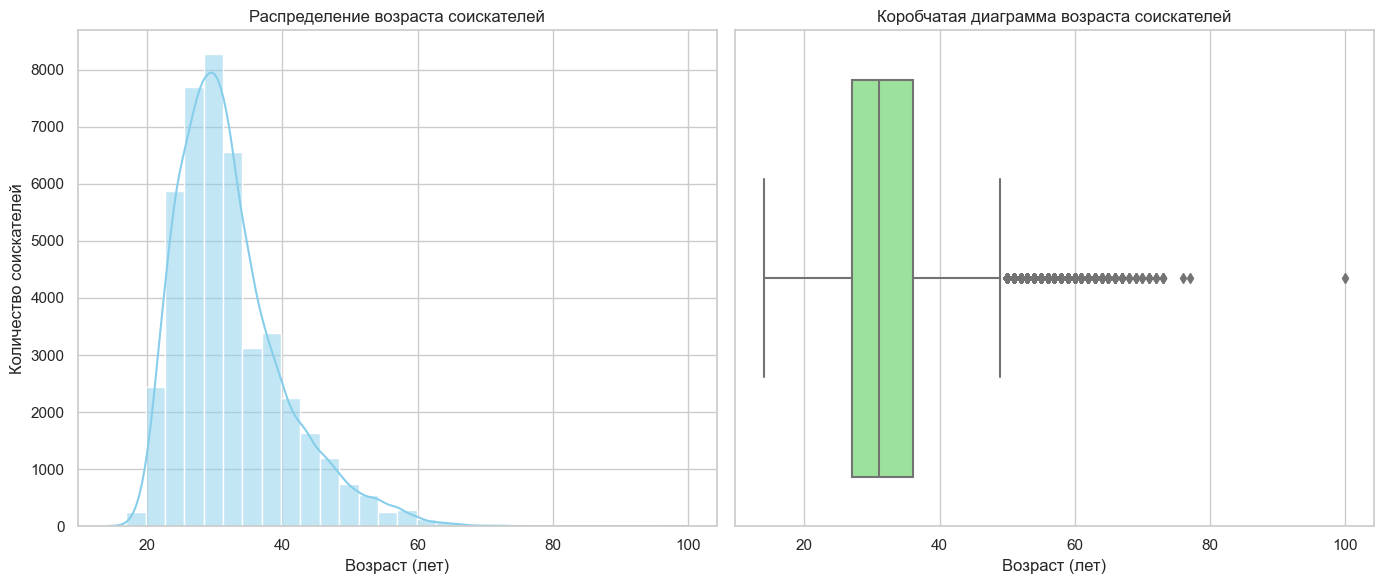

In [401]:
# ваш код здесь
# Настройка стиля графиков
sns.set(style="whitegrid")

# Создание фигуры с двумя подграфиками
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Гистограмма распределения возраста
sns.histplot(df['Возраст'], bins=30, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Распределение возраста соискателей')
axes[0].set_xlabel('Возраст (лет)')
axes[0].set_ylabel('Количество соискателей')

# Коробчатая диаграмма возраста
sns.boxplot(x=df['Возраст'], ax=axes[1], color='lightgreen')
axes[1].set_title('Коробчатая диаграмма возраста соискателей')
axes[1].set_xlabel('Возраст (лет)')

# Отображение графиков
plt.tight_layout()
plt.show()

ваши выводы по графику здесь

Из гистограмы видим что работу ищут люди (ВНИМАНИЕ!) работоспособного возраста, от 18 до 65 лет, видим "хвост" до 100 лет, видимо кто-то под 100 лет устраивается в IT)))

Люди в возрасте примерно от 25 до 35 ищут работу чаще, выше 50 - скорее исключения из правил.

2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

In [402]:
# Перевод в числовой вид
df['Опыт работы (месяц)'] = pd.to_numeric(df['Опыт работы (месяц)'], errors='coerce')

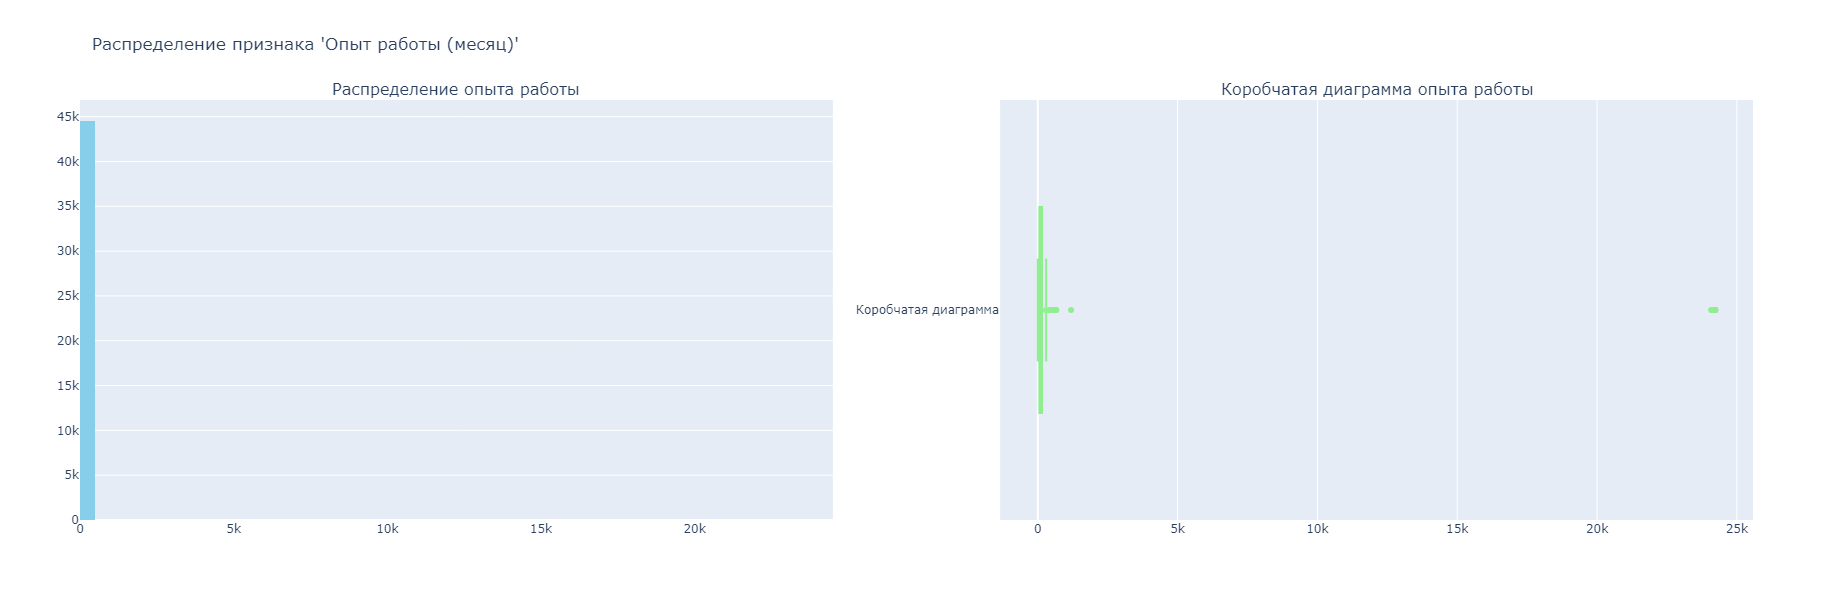

In [403]:
# ваш код здесь
# Создание фигуры с двумя подграфиками (гистограмма и коробчатая диаграмма)
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=("Распределение опыта работы", "Коробчатая диаграмма опыта работы")
)

# Добавление гистограммы
fig.add_trace(
    go.Histogram(
        x=df['Опыт работы (месяц)'],
        nbinsx=120,
        marker_color='skyblue',
        name='Гистограмма'
    ),
    row=1, col=1
)

# Добавление коробчатой диаграммы
fig.add_trace(
    go.Box(
        x=df['Опыт работы (месяц)'],
        marker_color='lightgreen',
        name='Коробчатая диаграмма'
    ),
    row=1, col=2
)

# Обновление макета
fig.update_layout(
    title_text="Распределение признака 'Опыт работы (месяц)'",
    showlegend=False,
    width=1200,
    height=600
)

# Отображение графиков
fig.show()

ваши выводы здесь

В данных есть выбросы и аномалии, которые мешают нормально посмотреть на данные, но из построенного можно увидеть что бОльшая часть людей имеет опыт примерно от 50 до 170 месяцев, что является средним, хорошим таким опытом.

3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака возраста? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


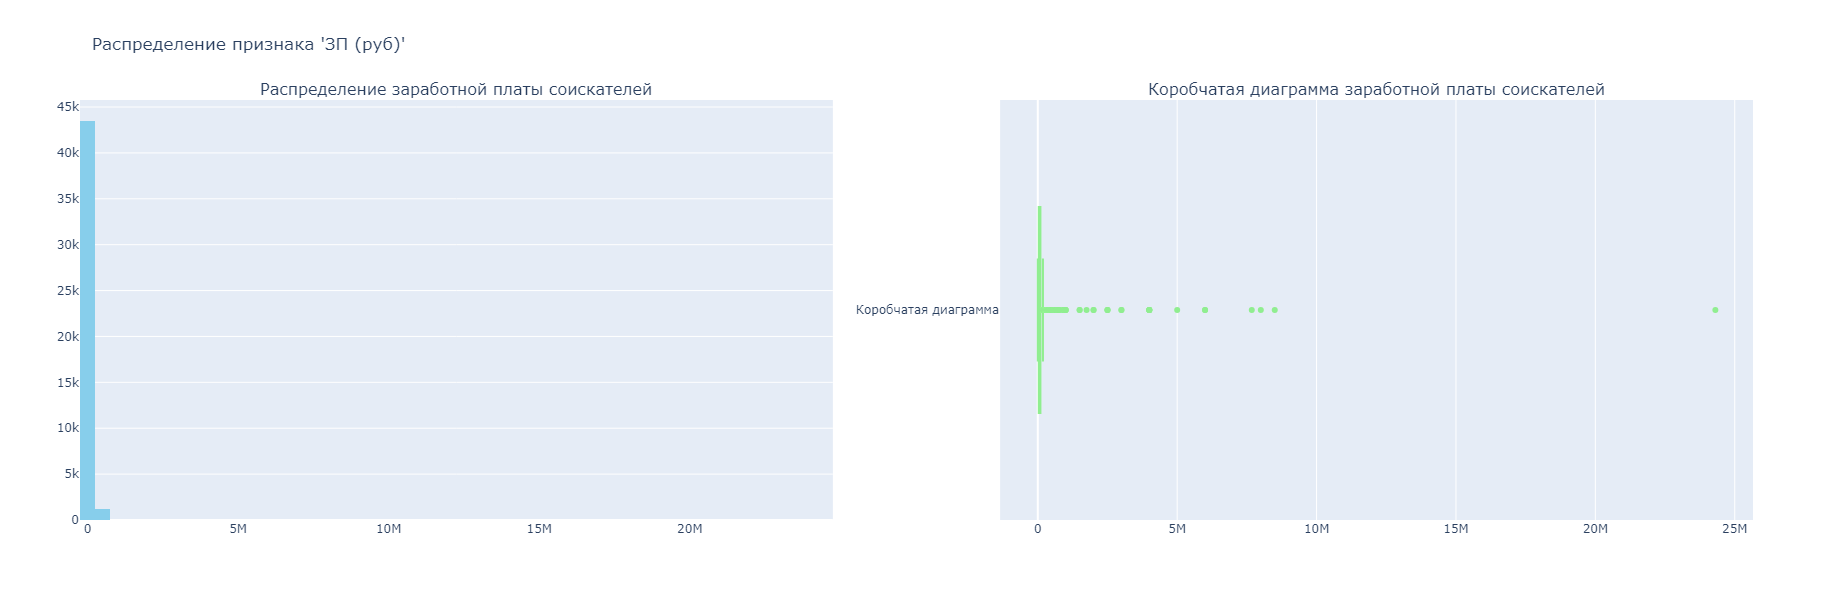

In [404]:
# ваш код здесь
# Создание фигуры с двумя подграфиками (гистограмма и коробчатая диаграмма)
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=("Распределение заработной платы соискателей", "Коробчатая диаграмма заработной платы соискателей")
)

# Добавление гистограммы
fig.add_trace(
    go.Histogram(
        x=df['ЗП (руб)'],
        nbinsx=120,
        marker_color='skyblue',
        name='Гистограмма'
    ),
    row=1, col=1
)

# Добавление коробчатой диаграммы
fig.add_trace(
    go.Box(
        x=df['ЗП (руб)'],
        marker_color='lightgreen',
        name='Коробчатая диаграмма'
    ),
    row=1, col=2
)

# Обновление макета
fig.update_layout(
    title_text="Распределение признака 'ЗП (руб)'",
    showlegend=False,
    width=1200,
    height=600
)

# Отображение графиков
fig.show()

ваши выводы здесь

В размере заработной платы так же есть аномалии (ну или люди реально не опечатались и указывали такую огромную зарплату), бОльшая часть хотелок ЗП в рамках от 70к до 95к

4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

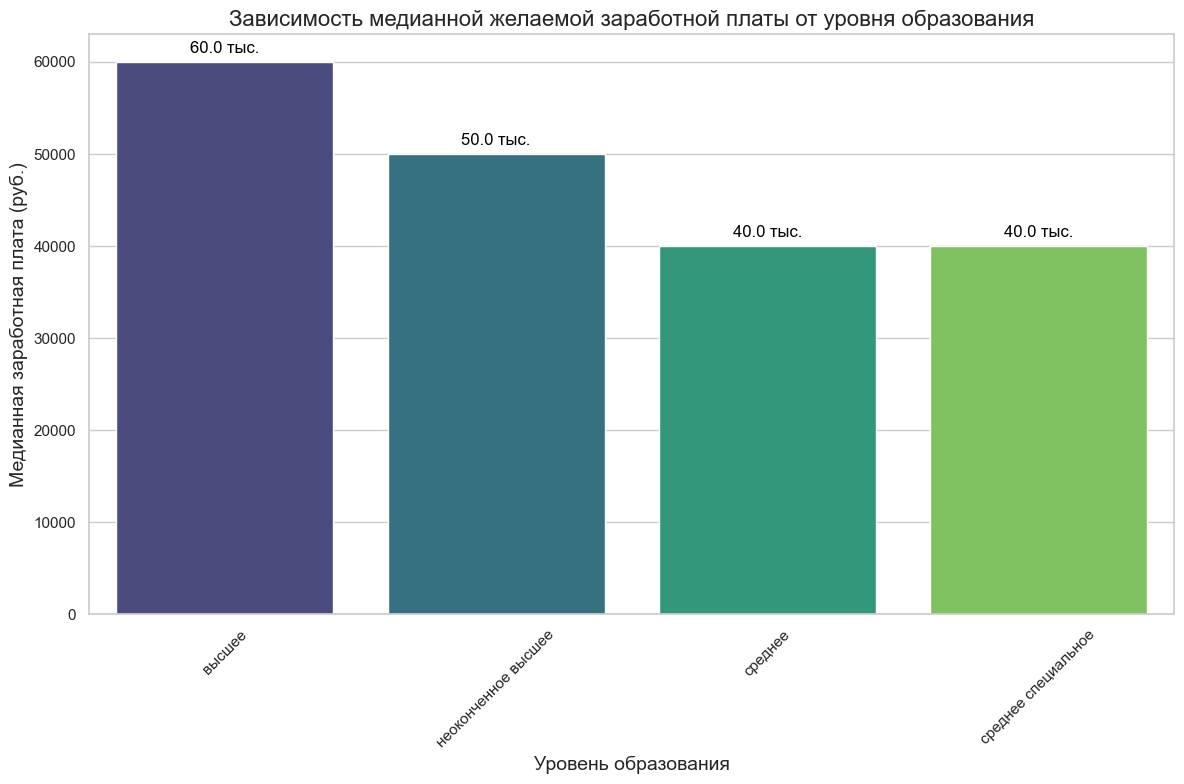

Наибольшая медианная заработная плата: 60000.0 руб. (Уровень образования: высшее)
Наименьшая медианная заработная плата: 40000.0 руб. (Уровень образования: среднее специальное)


In [405]:
# ваш код здесь
# Фильтрация данных: заработная плата менее 1,000,000 руб.
filtered_df = df[df['ЗП (руб)'] < 1_000_000]

# Группировка по уровню образования и вычисление медианной зарплаты
median_salary_by_education = filtered_df.groupby('Образование')['ЗП (руб)'].median().reset_index()

# Переименование столбцов для удобства
median_salary_by_education.rename(columns={'ЗП (руб)': 'Медианная ЗП (руб)'}, inplace=True)

# Сортировка по медианной зарплате для наглядности
median_salary_by_education = median_salary_by_education.sort_values(by='Медианная ЗП (руб)', ascending=False)

# Настройка стиля графиков Seaborn
sns.set(style="whitegrid")

# Создание фигуры
plt.figure(figsize=(12, 8))

# Построение столбчатой диаграммы
bar_plot = sns.barplot(
    data=median_salary_by_education,
    x='Образование',
    y='Медианная ЗП (руб)',
    palette='viridis'
)

# Добавление заголовка и меток осей
plt.title('Зависимость медианной желаемой заработной платы от уровня образования', fontsize=16)
plt.xlabel('Уровень образования', fontsize=14)
plt.ylabel('Медианная заработная плата (руб.)', fontsize=14)

# Добавление значений медианы над столбцами
for index, row in median_salary_by_education.iterrows():
    bar_plot.text(
        index, row['Медианная ЗП (руб)'] + 1000, 
        f"{row['Медианная ЗП (руб)'] // 1000} тыс.", 
        color='black', ha="center", fontsize=12
    )

# Поворот названий категорий по оси X для лучшей читаемости
plt.xticks(rotation=45)

# Отображение графика
plt.tight_layout()
plt.show()

# Наибольшая медианная зарплата
highest_salary = median_salary_by_education.iloc[0]
print(f"Наибольшая медианная заработная плата: {highest_salary['Медианная ЗП (руб)']} руб. (Уровень образования: {highest_salary['Образование']})")

# Наименьшая медианная зарплата
lowest_salary = median_salary_by_education.iloc[-1]
print(f"Наименьшая медианная заработная плата: {lowest_salary['Медианная ЗП (руб)']} руб. (Уровень образования: {lowest_salary['Образование']})")


ваши выводы здесь

Как видно люди с высшим образованием получают зарплату выше, чем без высшего образования, получается что уровень образования коррелирует с получаемым доходом, в рамках данного датасета.

Люди со средним\средне специальным образованием не расчитывают на золотые горы:(

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

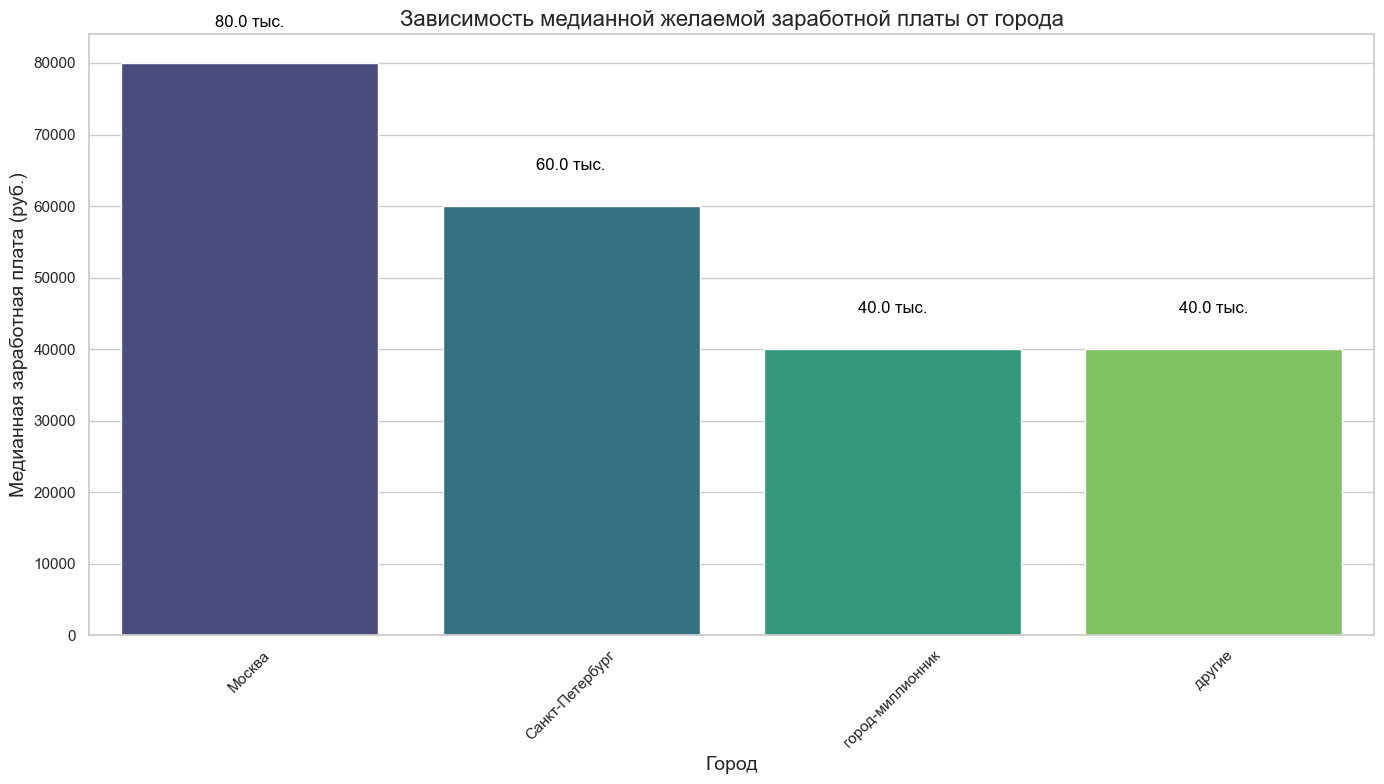

In [406]:
# ваш код здесь
# Группировка по городу и вычисление медианной зарплаты
median_salary_by_city = filtered_df.groupby('Город')['ЗП (руб)'].median().reset_index()

# Переименование столбцов для удобства
median_salary_by_city.rename(columns={'ЗП (руб)': 'Медианная ЗП (руб)'}, inplace=True)

# Сортировка по медианной зарплате для наглядности
median_salary_by_city = median_salary_by_city.sort_values(by='Медианная ЗП (руб)', ascending=False)

# Настройка стиля графиков Seaborn
sns.set(style="whitegrid")

# Создание фигуры
plt.figure(figsize=(14, 8))

# Построение столбчатой диаграммы с медианой и размахом
bar_plot = sns.barplot(
    data=median_salary_by_city,
    x='Город',
    y='Медианная ЗП (руб)',
    palette='viridis',
    errorbar='sd'  # Показывает стандартное отклонение как размах
)

# Добавление заголовка и меток осей
plt.title('Зависимость медианной желаемой заработной платы от города', fontsize=16)
plt.xlabel('Город', fontsize=14)
plt.ylabel('Медианная заработная плата (руб.)', fontsize=14)

# Добавление значений медианы над столбцами
for index, row in median_salary_by_city.iterrows():
    bar_plot.text(
        index, row['Медианная ЗП (руб)'] + 5000, 
        f"{row['Медианная ЗП (руб)'] // 1000} тыс.", 
        color='black', ha="center", fontsize=12
    )

# Поворот названий категорий по оси X для лучшей читаемости
plt.xticks(rotation=45)

# Отображение графика
plt.tight_layout()
plt.show()


ваши выводы здесь

Москва, снова Москва))

Видимо стоимость жизни дает о себе знать и в Москве люди хотят зарабатывать больше, в % соотношении это большая разница (в 2 раза по сравнению с городами периферии).

6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

   Готовность к переезду  Готовность к командировкам  Медианная ЗП (руб)
0                  False                       False             40000.0
1                  False                        True             65000.0
2                   True                       False             50000.0
3                   True                        True             67000.0


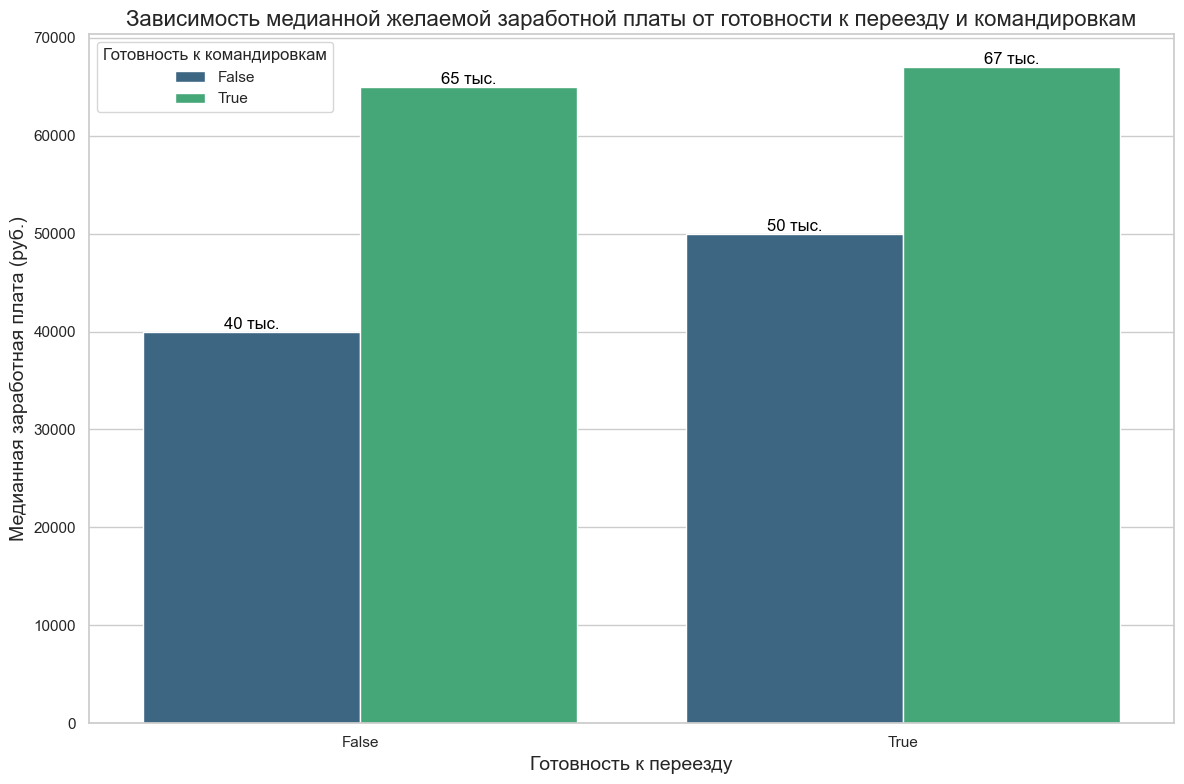

In [407]:
# ваш код здесь
# Фильтрация данных: заработная плата менее 1,000,000 руб.
filtered_df = df[df['ЗП (руб)'] < 1_000_000]

# Группировка по признакам "Готовность к переезду" и "Готовность к командировкам" и вычисление медианы зарплаты
median_salary = filtered_df.groupby(['Готовность к переезду', 'Готовность к командировкам'])['ЗП (руб)'].median().reset_index()

# Переименование столбцов для удобства
median_salary.rename(columns={'ЗП (руб)': 'Медианная ЗП (руб)'}, inplace=True)

# Просмотр первых нескольких строк результата
print(median_salary.head())

# Настройка стиля графиков Seaborn
sns.set(style="whitegrid")

# Создание фигуры
plt.figure(figsize=(12, 8))

# Построение столбчатой диаграммы с использованием hue для второго признака
bar_plot = sns.barplot(
    data=median_salary,
    x='Готовность к переезду',
    y='Медианная ЗП (руб)',
    hue='Готовность к командировкам',
    palette='viridis'
)

# Добавление заголовка и меток осей
plt.title('Зависимость медианной желаемой заработной платы от готовности к переезду и командировкам', fontsize=16)
plt.xlabel('Готовность к переезду', fontsize=14)
plt.ylabel('Медианная заработная плата (руб.)', fontsize=14)

# Добавление значений медианы над столбцами
for p in bar_plot.patches:
    height = p.get_height()
    bar_plot.annotate(f'{int(height/1000)} тыс.',
                      (p.get_x() + p.get_width() / 2., height),
                      ha='center', va='bottom', fontsize=12, color='black')

# Поворот легенды для лучшей читаемости (если необходимо)
plt.legend(title='Готовность к командировкам')

# Отображение графика
plt.tight_layout()
plt.show()


ваши выводы здесь

Анализ диаграммы:

Наибольшие уровни заработной платы:

    Соискатели, готовые к переезду и к командировкам, демонстрируют наивысшую медианную заработную плату (~67 тыс. руб.).
    
Наименьшие уровни заработной платы:

    Соискатели, не готовые ни к переезду, ни к командировкам, имеют наименьшую медианную заработную плату (~40 тыс. руб.).
    Средние уровни заработной платы:
    Соискатели, готовые к переезду, но не готовые к командировкам, имеют медианную заработную плату около ~50 тыс. руб.
    Соискатели, готовые к командировкам, но не готовые к переезду, имеют медианную заработную плату около ~65 тыс. руб.

Выводы:

Влияние готовности к переезду и командировкам на заработную плату:
    Готовность к переезду значительно влияет на уровень заработной платы. Соискатели, готовые к переезду, как правило, получают более высокие предложения по зарплате.
    Готовность к командировкам также влияет на заработную плату, но в меньшей степени по сравнению с готовностью к переезду.
    
Наибольшие и наименьшие уровни заработной платы:

    Наибольшая зарплата наблюдается у соискателей, готовых как к переезду, так и к командировкам (~55 тыс. руб.).  
    Наименьшая зарплата зафиксирована у тех, кто не готов ни к переезду, ни к командировкам (~35 тыс. руб.).
    
Важность признака уровня готовности к переезду и командировкам:

    Высокая важность: Признаки «Готовность к переезду» и «Готовность к командировкам» являются важными факторами при прогнозировании заработной платы. Готовность к переезду особенно сильно связана с более высокими заработными платами, что может быть обусловлено увеличенными требованиями работодателей или большей гибкостью соискателей.
    
Практическое значение:

    Для работодателей: Учитывая, что готовность к переезду связана с более высокими зарплатами, работодатели могут использовать эту информацию при формировании предложений, а также при планировании кадровой политики.
    Для соискателей: Готовность к переезду и командировкам может повысить шансы на получение более высоких зарплатных предложений.

7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

In [408]:
# ваш код здесь
# ваш код здесь
# Для анализа мы будем использовать только те резюме, где желаемая заработная плата меньше 1 миллиона рублей. 
# Это позволит исключить аномальные значения и сфокусироваться на основной массе данных.
# Фильтрация данных: заработная плата менее 1,000,000 руб.
filtered_df = df[df['ЗП (руб)'] < 1_000_000]

# Определение возрастных групп
bins = [18, 25, 30, 35, 40, 45, 50, 60] 
labels = ['18-25', '26-30', '31-35', '36-40', '41-45', '46-50', '51-60']

# Создание нового признака "Возрастная группа"
filtered_df['Возрастная группа'] = pd.cut(filtered_df['Возраст'], bins=bins, labels=labels, right=False)

# Проверка распределения по возрастным группам
print(filtered_df['Возрастная группа'].value_counts())

# Создание сводной таблицы
pivot_table = filtered_df.pivot_table(
    index='Возрастная группа',
    columns='Образование',
    values='ЗП (руб)',
    aggfunc='median'
)

# Заполнение пропусков (NaN) нулями
pivot_table = pivot_table.fillna(0)

# Просмотр сводной таблицы
pivot_table


26-30    12670
31-35    12059
36-40     6502
18-25     6326
41-45     3435
46-50     1932
51-60     1544
Name: Возрастная группа, dtype: int64


C:\Users\User\AppData\Local\Temp\ipykernel_48084\3144812546.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Образование         высшее  неоконченное высшее  среднее  среднее специальное
Возрастная группа                                                            
18-25              45000.0              40000.0  40000.0              30000.0
26-30              55000.0              50000.0  40000.0              40000.0
31-35              67472.0              55000.0  45000.0              40000.0
36-40              75000.0              60000.0  50000.0              41000.0
41-45              80000.0              75000.0  45000.0              45000.0
46-50              80000.0              70000.0  45000.0              40000.0
51-60              70000.0              50000.0  35000.0              40000.0

В качестве бонуса:)))))

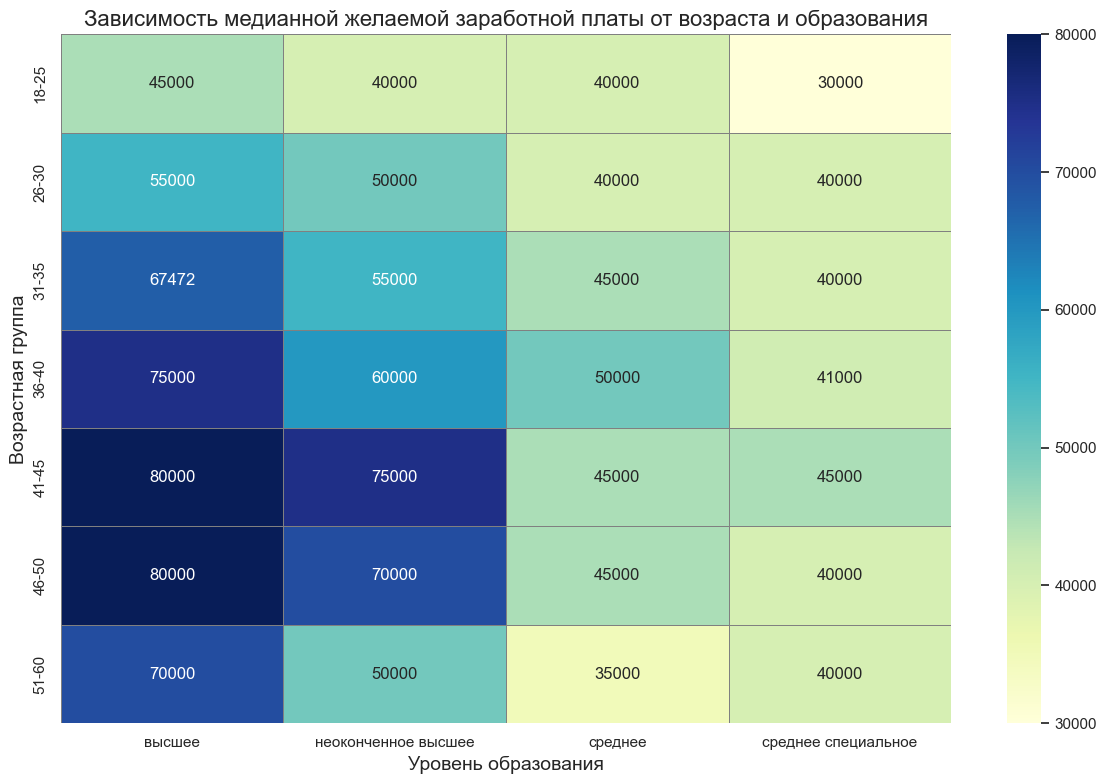

In [409]:
# Настройка стиля графиков Seaborn
sns.set(style="whitegrid")

# Создание фигуры
plt.figure(figsize=(12, 8))

# Построение тепловой карты
heatmap = sns.heatmap(
    pivot_table,
    annot=True,        # Отображение числовых значений на карте
    fmt=".0f",         # Формат чисел
    cmap="YlGnBu",     # Цветовая палитра
    linewidths=.5,     # Ширина линий между ячейками
    linecolor='gray'
)

# Добавление заголовка и меток осей
plt.title('Зависимость медианной желаемой заработной платы от возраста и образования', fontsize=16)
plt.xlabel('Уровень образования', fontsize=14)
plt.ylabel('Возрастная группа', fontsize=14)

# Отображение графика
plt.tight_layout()
plt.show()

ваши выводы здесь

Наибольшие и наименьшие уровни медианной заработной платы

Наибольшая медианная заработная плата:
- Возрастные группы **41-45** и **46-50** с высшим образованием демонстрируют наивысшие медианные заработные платы — **80,000 руб.**.
- Возрастная группа **36-40** с высшим образованием показывает **75,000 руб.**.

Наименьшая медианная заработная плата:
- Возрастная группа **18-25** с средним специальным образованием имеет наименьшую медианную заработную плату — **30,000 руб.**.
- Возрастная группа **51-60** с средним образованием показывает **35,000 руб.**.

---

Зависимость медианной заработной платы от возраста и образования

Возрастная динамика:
- Молодые соискатели (**18-25**) с высшим образованием начинают с **45,000 руб.**, увеличивая до **55,000 руб.** в группе **26-30**.
- Пик заработной платы наблюдается в возрастных группах **31-35**, **36-40**, **41-45** и **46-50**, достигая **67,472 руб.** до **80,000 руб.**.
- Снижение заработной платы начинается в более зрелых возрастных группах **51-60**, где медианная заработная плата снижается до **70,000 руб.** для высшего образования и до **35,000 руб.** для среднего образования.

Влияние уровня образования:
- **Высшее образование** стабильно показывает самые высокие медианные зарплаты в каждой возрастной группе.
- **Неоконченное высшее образование** также демонстрирует относительно высокие медианные зарплаты, особенно в возрастных группах **26-30**, **31-35**, и **36-40**.
- **Среднее** и **среднее специальное образование** показывают более низкие медианные заработные платы по сравнению с высшим и неоконченным высшим образованием, с незначительными вариациями между возрастными группами.

---

Размах заработной платы внутри групп

- **Высшее образование** имеет наибольший размах заработной платы между возрастными группами, начиная с **45,000 руб.** в молодом возрасте и достигая **80,000 руб.** в зрелом.
- **Среднее специальное образование** показывает меньший размах, колеблясь от **30,000 руб.** до **45,000 руб.**.
- **Среднее образование** демонстрирует самую низкую и стабильную медианную зарплату, начиная с **35,000 руб.** и достигая **40,000 руб.** в зрелых группах.
- **Неоконченное высшее образование** показывает умеренный размах, от **40,000 руб.** до **75,000 руб.**.

---

Важность уровня образования при прогнозировании заработной платы

1. **Высокая значимость**:  
   Уровень образования является ключевым фактором, влияющим на медианную заработную плату. Соискатели с высшим образованием стабильно получают более высокие зарплаты по сравнению с остальными группами.

2. **Возраст как дополнительный фактор**:  
   В сочетании с уровнем образования, возрастной фактор помогает объяснить динамику заработной платы. Молодые специалисты с высшим образованием начинают с умеренных зарплат, которые увеличиваются с накоплением опыта и достигают пика в зрелом возрасте.

3. **Снижение заработной платы в зрелом возрасте**:  
   В старших возрастных группах наблюдается снижение медианной заработной платы даже при высоком уровне образования, что может быть связано с изменением карьерных целей, снижением активности на рынке труда или другими факторами.


8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

C:\Users\User\AppData\Local\Temp\ipykernel_48084\169397928.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\User\AppData\Local\Temp\ipykernel_48084\169397928.py:34: MatplotlibDeprecationWarning:

Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.



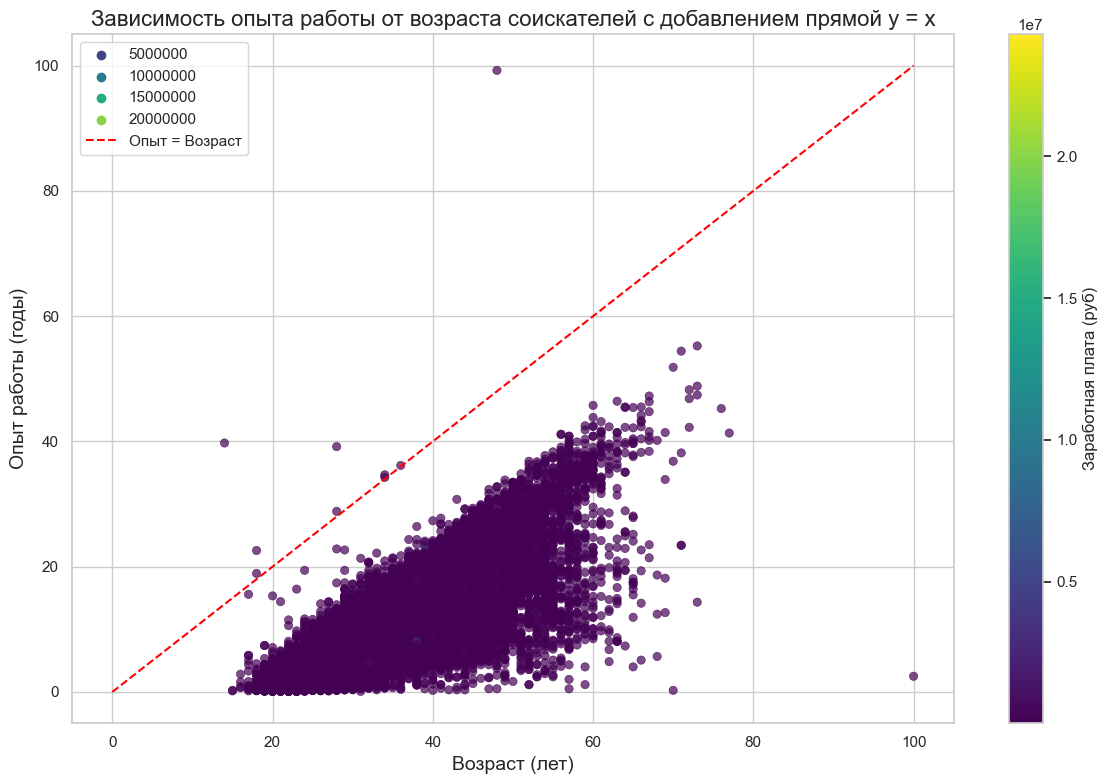

In [410]:
# ваш код здесь
# Уберем выбросы
filtered_df = df[df['Опыт работы (месяц)'] < 1200]
# Создание нового признака "Опыт работы (годы)"
filtered_df['Опыт работы (годы)'] = filtered_df['Опыт работы (месяц)'] / 12

# Настройка стиля графиков Seaborn
sns.set(style="whitegrid")

# Добавление прямой y = x
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=filtered_df,
    x='Возраст',
    y='Опыт работы (годы)',
    hue='ЗП (руб)',
    palette='viridis',
    alpha=0.7,
    edgecolor=None
)

# Построение прямой y = x
plt.plot([0, 100], [0, 100], color='red', linestyle='--', label='Опыт = Возраст')

# Добавление заголовка и меток осей
plt.title('Зависимость опыта работы от возраста соискателей с добавлением прямой y = x', fontsize=16)
plt.xlabel('Возраст (лет)', fontsize=14)
plt.ylabel('Опыт работы (годы)', fontsize=14)

# Добавление цветовой шкалы (колорбара)
norm = plt.Normalize(filtered_df['ЗП (руб)'].min(), filtered_df['ЗП (руб)'].max())
sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Заработная плата (руб)', fontsize=12)

# Добавление легенды
plt.legend()

# Отображение графика
plt.tight_layout()
plt.show()

ваши выводы здесь

Распределение данных:

    Большинство соискателей имеют опыт работы, меньший, чем их возраст (точки лежат ниже прямой y = x).
    Есть несколько точек, лежащих на прямой или выше неё, которые являются аномалиями.

Выделение аномалий:

- Аномалии (точки на или выше прямой y = x) означают, что опыт работы соискателя больше или равен его возрасту. Это может свидетельствовать о:
- Ошибках в данных (например, неверно указан возраст или опыт работы).

Зависимость опыта работы от возраста:

- Молодые соискатели (18-25 лет): Имеют ограниченный опыт работы (до 3 лет), что ожидаемо.
- Средний возраст (26-40 лет): Набирается значительный опыт работы (до 7 лет).
- Зрелый возраст (41-60 лет): Опыт работы стабилизируется или немного снижается, возможно, из-за смены карьеры или других факторов.

Влияние заработной платы:

    Цветовая градация показывает, что более высокие зарплаты ассоциируются с более старшими возрастными группами и большим опытом работы, что логично с точки зрения накопления квалификации и опыта.

Выводы:

Соотношение опыта работы и возраста показывает ожидаемую тенденцию: с возрастом и накоплением опыта зарплаты растут, но существует логичная граница, где опыт не должен превышать возраст.
Аномалии могут указывать на возможные ошибки в данных или особые случаи, требующие дополнительного анализа.
Важность признака возраста и опыта работы: Оба признака являются важными факторами при прогнозировании заработной платы, так как они тесно связаны с квалификацией, ответственностью и востребованностью на рынке труда.

**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


In [411]:
# ваш код здесь
# Фильтрация данных: заработная плата менее 1,000,000 руб.
filtered_df = df[df['ЗП (руб)'] < 1_000_000]

# Создание сводной таблицы с медианной зарплатой по образованию и готовности к переезду
pivot_education_relocation = filtered_df.pivot_table(
    index='Образование',
    columns='Готовность к переезду',
    values='ЗП (руб)',
    aggfunc='median'
)

# Заполнение пропусков для визуализации
pivot_education_relocation = pivot_education_relocation.fillna(0)

# Просмотр сводной таблицы
pivot_education_relocation

Готовность к переезду    False    True 
Образование                            
высшее                 60000.0  70000.0
неоконченное высшее    45000.0  50000.0
среднее                40000.0  50000.0
среднее специальное    35000.0  40000.0

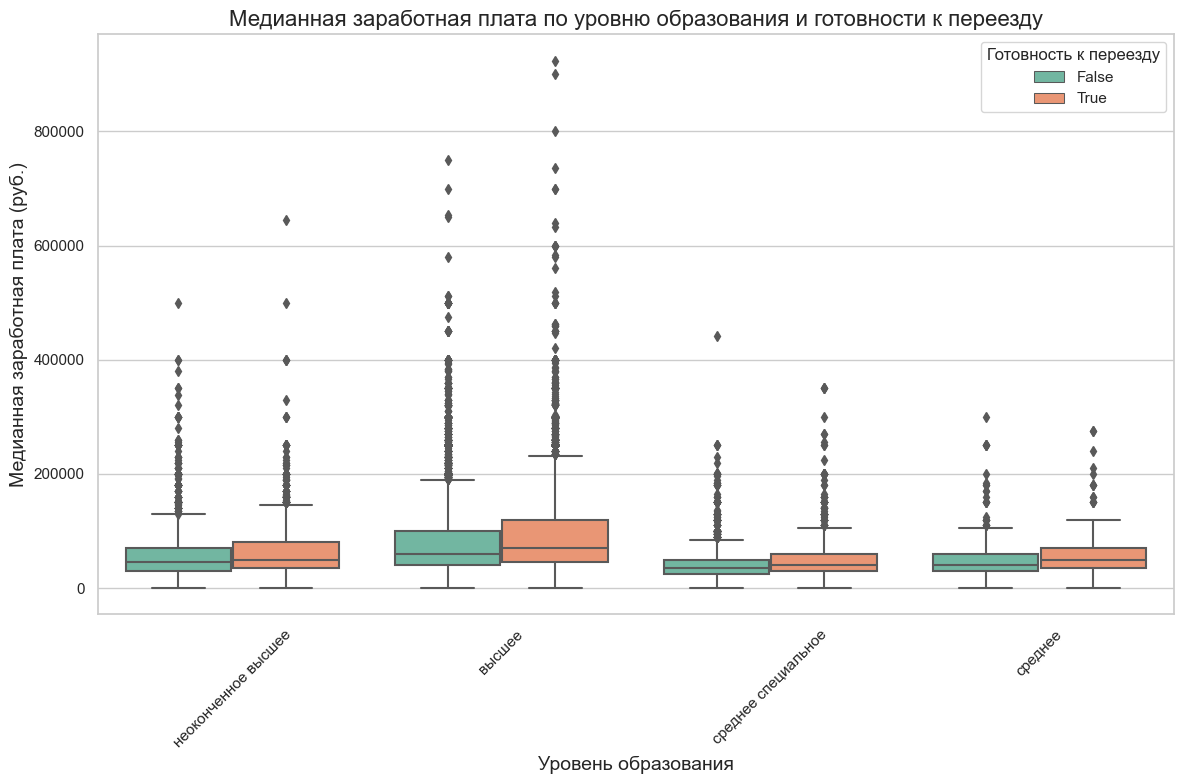

In [412]:
# Настройка стиля графиков Seaborn
sns.set(style="whitegrid")

# Создание фигуры
plt.figure(figsize=(12, 8))

# Построение Boxplot
sns.boxplot(
    data=filtered_df,
    x='Образование',
    y='ЗП (руб)',
    hue='Готовность к переезду',
    palette='Set2'
)

# Добавление заголовка и меток осей
plt.title('Медианная заработная плата по уровню образования и готовности к переезду', fontsize=16)
plt.xlabel('Уровень образования', fontsize=14)
plt.ylabel('Медианная заработная плата (руб.)', fontsize=14)

# Добавление легенды
plt.legend(title='Готовность к переезду')

# Поворот названий категорий по оси X для лучшей читаемости
plt.xticks(rotation=45)

# Отображение графика
plt.tight_layout()
plt.show()


ваши выводы здесь

Из графика видим что готовые к переезду люди получают больше, но при этом в каждой группе по образованию, так же разбросы для людей с высшим образованием больше.

Люди со средним образованием не готовые на переезд - жалко этих добряков.

Тепловая карта зависимости медианной заработной платы от возраста и опыта работы

In [413]:
# Фильтрация данных: заработная плата менее 1,000,000 руб.
filtered_df = df[df['ЗП (руб)'] < 1_000_000]

# Определение возрастных групп
bins_age = [18, 25, 30, 35, 40, 45, 50, 60] 
labels_age = ['18-25', '26-30', '31-35', '36-40', '41-45', '46-50', '51-60']

# Создание нового признака "Возрастная группа"
filtered_df['Возрастная группа'] = pd.cut(filtered_df['Возраст'], bins=bins_age, labels=labels_age, right=False)

# Уберем выбросы в опыте работы (опыт работы менее 100 лет, т.е. 1200 месяцев)
filtered_df = filtered_df[filtered_df['Опыт работы (месяц)'] < 1200]

# Преобразование опыта работы из месяцев в годы
filtered_df['Опыт работы (годы)'] = filtered_df['Опыт работы (месяц)'] / 12

# Определение категорий опыта работы
bins_exp = [0, 1, 3, 5, 10, float('inf')]
labels_exp = ['0-1', '1-3', '3-5', '5-10', '10+']

# Создание нового признака "Категория опыта работы"
filtered_df['Категория опыта работы'] = pd.cut(filtered_df['Опыт работы (годы)'], bins=bins_exp, labels=labels_exp, right=False)

# Проверка распределения по категориям опыта работы
filtered_df['Категория опыта работы'].value_counts()

C:\Users\User\AppData\Local\Temp\ipykernel_48084\796677279.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



10+     17969
5-10    14724
3-5      5527
1-3      4872
0-1      1432
Name: Категория опыта работы, dtype: int64

In [414]:
# Создание сводной таблицы с медианной зарплатой по возрастной группе и категории опыта работы
pivot_age_experience = filtered_df.pivot_table(
    index='Возрастная группа',
    columns='Категория опыта работы',
    values='ЗП (руб)',
    aggfunc='median'
)

# Заполнение пропусков для визуализации
pivot_age_experience = pivot_age_experience.fillna(0)

# Просмотр сводной таблицы
pivot_age_experience

Категория опыта работы      0-1      1-3      3-5     5-10      10+
Возрастная группа                                                  
18-25                   30000.0  40000.0  45000.0  50000.0  30000.0
26-30                   33000.0  40000.0  50000.0  55000.0  70000.0
31-35                   30000.0  40000.0  40000.0  60000.0  70000.0
36-40                   35000.0  40000.0  45000.0  50000.0  80000.0
41-45                   30000.0  45000.0  50000.0  50000.0  80000.0
46-50                   60000.0  32500.0  25000.0  50000.0  75000.0
51-60                   75000.0  40000.0  45000.0  50000.0  60000.0

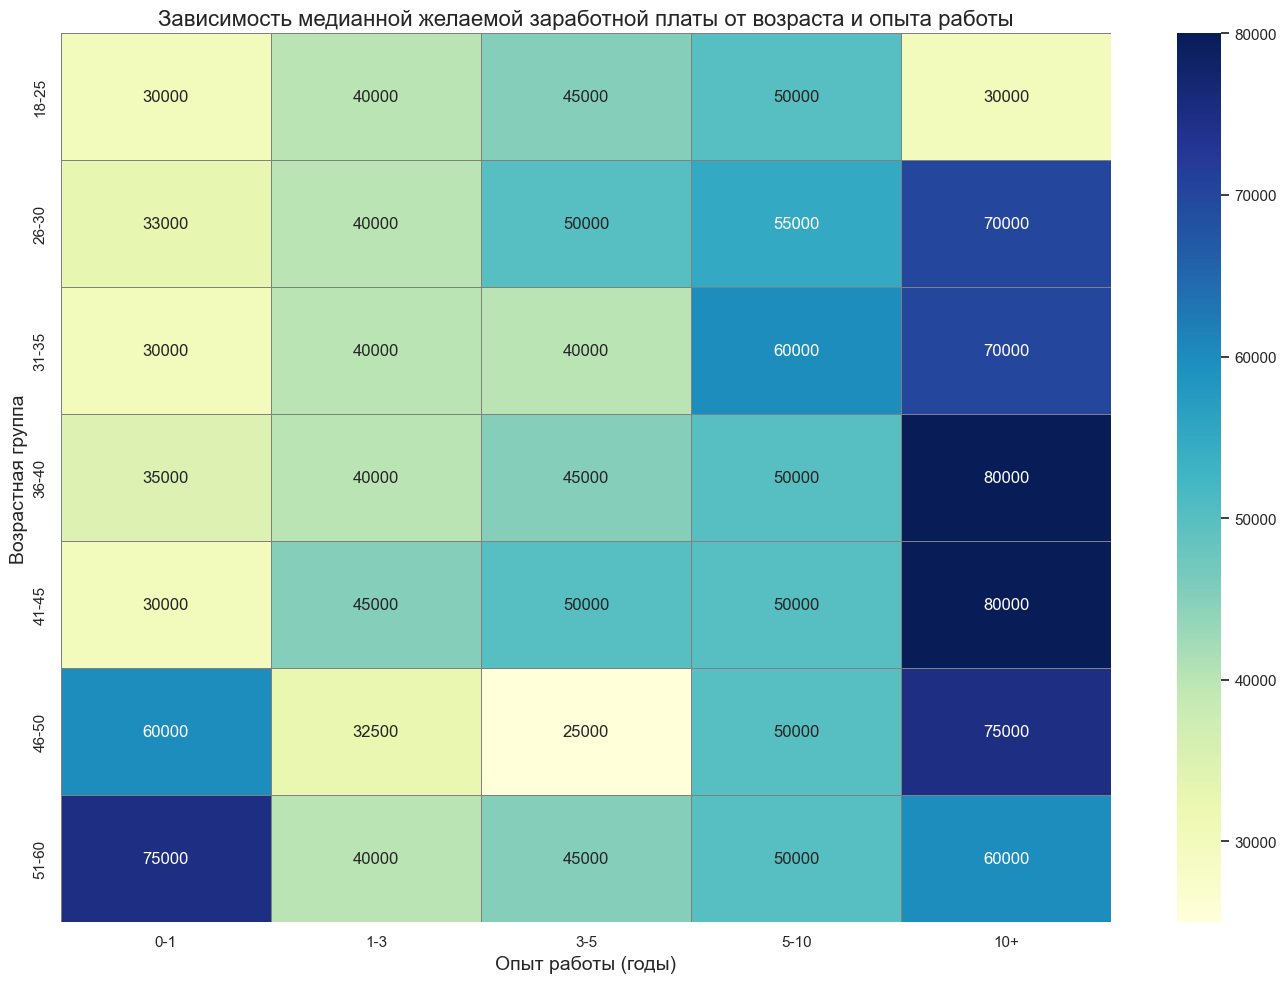

In [415]:
# Настройка стиля графиков Seaborn
sns.set(style="white")

# Создание фигуры
plt.figure(figsize=(14, 10))

# Построение тепловой карты
heatmap = sns.heatmap(
    pivot_age_experience,
    annot=True,        # Отображение числовых значений на карте
    fmt=".0f",         # Формат чисел
    cmap="YlGnBu",     # Цветовая палитра
    linewidths=.5,     # Ширина линий между ячейками
    linecolor='gray'
)

# Добавление заголовка и меток осей
plt.title('Зависимость медианной желаемой заработной платы от возраста и опыта работы', fontsize=16)
plt.xlabel('Опыт работы (годы)', fontsize=14)
plt.ylabel('Возрастная группа', fontsize=14)

# Отображение графика
plt.tight_layout()
plt.show()


Общие тенденции:

    Рост зарплаты с опытом работы: В большинстве возрастных групп наблюдается увеличение медианной заработной платы с ростом опыта работы.
    Пик заработной платы: Наиболее высокие значения медианной зарплаты достигаются в возрастных группах 36-40, 41-45 и 46-50 лет при опыте работы 10+ лет.
    
Детальный анализ по возрастным группам:

    18-25 лет:
    Вывод: Наиболее высокая зарплата наблюдается при опыте работы 5-10 лет (50,000 руб.), однако опыт работы 10+ лет показывает снижение до 30,000 руб., что может указывать на ошибки в данных или специфические карьерные траектории.

    26-30 лет:
    Вывод: Явный рост зарплаты с увеличением опыта работы, достигая пика в 70,000 руб. при 10+ лет опыта.

    31-35 лет:
    Вывод: Увеличение зарплаты до 60,000 руб. при 5-10 лет и до 70,000 руб. при 10+ годах опыта. Незначительный рост между 1-3 и 3-5 годами опыта.

    36-40 лет:
    Вывод: Постоянный рост зарплаты с опытом работы, достигая максимума в 80,000 руб. при 10+ годах.

    41-45 лет:
    Вывод: Сильный рост зарплаты до 80,000 руб. при 10+ годах опыта. Наблюдается стабильность между 3-5 и 5-10 годами опыта.

    46-50 лет:
    Вывод: Наличие аномалий: высокая зарплата при 0-1 годе опыта (60,000 руб.) и низкие значения при 1-3 (32,500 руб.) и 3-5 годах (25,000 руб.), что может свидетельствовать о ошибках в данных или необычных карьерных путях.

    51-60 лет:
    Вывод: Высокая зарплата при 0-1 годе опыта (75,000 руб.) и постепенное снижение до 60,000 руб. при 10+ годах опыта, что может указывать на смену карьеры или сокращение активности на рынке труда.

Аномалии:

    Возрастная группа 18-25:
    10+ лет опыта работы при возрасте 18-25 лет кажется невозможным и может указывать на ошибки в данных.
    
    Возрастная группа 46-50:
    0-1 год опыта работы с зарплатой 60,000 руб. и 1-3 года с 32,500 руб., а также 3-5 лет с 25,000 руб., что не соответствует ожидаемым тенденциям.

    Возрастная группа 51-60:
    0-1 год опыта работы с зарплатой 75,000 руб. выглядит аномально высоким.
    
Выводы:

Влияние опыта работы:

    В большинстве возрастных групп наблюдается прямое отношение между опытом работы и уровнем заработной платы. Чем больше опыта, тем выше зарплата.

Влияние возраста:

    Зрелые возрастные группы (31-50 лет) демонстрируют наибольший рост зарплаты с увеличением опыта работы, достигая пиковых значений.
    Молодые (18-25 лет) и старшие (51-60 лет) группы показывают более нестабильные и аномальные значения, что требует дополнительного анализа.

Аномалии и возможные причины:

    Ошибки данных: Неправильный ввод возраста или опыта работы.
    Особые случаи: Переход карьеры, частичная занятость или другие факторы, влияющие на соотношение возраста и опыта работы.

Важность качественной очистки данных:

    Для получения точных и надежных результатов необходимо проверить и очистить данные от аномалий и ошибок.

# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [417]:
# ваш код здесь
# Поиск полных дубликатов
duplicates = df.duplicated()
print(f"Количество полных дубликатов: {duplicates.sum()}")

# Удаление дубликатов
df.drop_duplicates(inplace=True)
print(f"Количество записей после удаления дубликатов: {df.shape[0]}")

# 4. Проверка, что дубликаты удалены
print(f"Проверка наличия дубликатов после удаления: {df.duplicated().sum()}")

Количество полных дубликатов: 158
Количество записей после удаления дубликатов: 44586
Проверка наличия дубликатов после удаления: 0


2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [305]:
# ваш код здесь
print(f"Количество пропусков в столбцах: {df.isnull().sum()}")

Количество пропусков в столбцах: Ищет работу на должность:              0
Последнее/нынешнее место работы        1
Последняя/нынешняя должность           2
Обновление резюме                      0
Авто                                   0
Образование                            0
Пол                                    0
Возраст                                0
Опыт работы (месяц)                  170
Город                                  0
Готовность к переезду                  0
Готовность к командировкам         10797
полная занятость                       0
частичная занятость                    0
проектная работа                       0
волонтерство                           0
стажировка                             0
полный день                            0
сменный график                         0
гибкий график                          0
удаленная работа                       0
вахтовый метод                         0
ЗП (руб)                               0
dtype: int64


3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

У меня есть пропуски в столбце "Готовность к командировкам", его заполню False, т.к. не упоминание о камандировках, скорее всего может означать что человек и не задумывался о них.

In [306]:
# ваш код здесь
# Удаление строк с пропусками в "Последнее/нынешнее место работы" и "Последняя/нынешняя должность"
columns_to_drop_na = ["Последнее/нынешнее место работы", "Последняя/нынешняя должность"]
df.dropna(subset=columns_to_drop_na, inplace=True)
print(f"Количество записей после удаления строк с пропусками: {df.shape[0]}")

# Заполнение пропусков в "Готовность к командировкам" значением False
df['Готовность к командировкам'] = df['Готовность к командировкам'].fillna(False)

# Заполнение пропусков в "Опыт работы (месяц)" медианным значением
median_experience = df['Опыт работы (месяц)'].median()
df['Опыт работы (месяц)'] = df['Опыт работы (месяц)'].fillna(median_experience)
print(f"Медианное значение опыта работы (месяц): {median_experience}")

# Проверка наличия пропусков после обработки
missing_values_after = df.isnull().sum()
print(f"Количество пропусков в столбцах после обработки: {missing_values_after}")

Количество записей после удаления строк с пропусками: 44584
Медианное значение опыта работы (месяц): 100.0
Количество пропусков в столбцах после обработки: Ищет работу на должность:          0
Последнее/нынешнее место работы    0
Последняя/нынешняя должность       0
Обновление резюме                  0
Авто                               0
Образование                        0
Пол                                0
Возраст                            0
Опыт работы (месяц)                0
Город                              0
Готовность к переезду              0
Готовность к командировкам         0
полная занятость                   0
частичная занятость                0
проектная работа                   0
волонтерство                       0
стажировка                         0
полный день                        0
сменный график                     0
гибкий график                      0
удаленная работа                   0
вахтовый метод                     0
ЗП (руб)                      

4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [307]:
# ваш код здесь
# Удаление резюме с ЗП <1,000 руб. или >1,000,000 руб.
salary_min = 1000
salary_max = 1_000_000
df = df[(df['ЗП (руб)'] >= salary_min) & (df['ЗП (руб)'] <= salary_max)]
print(f"Количество записей после удаления выбросов по заработной плате: {df.shape[0]}")

# 2. Проверка диапазона заработной платы
print("Диапазон заработной платы после удаления выбросов:")
df['ЗП (руб)'].describe()

Количество записей после удаления выбросов по заработной плате: 44341
Диапазон заработной платы после удаления выбросов:


count      44341.000000
mean       75800.794967
std        61060.478106
min         1000.000000
25%        38000.000000
50%        60000.000000
75%        95000.000000
max      1000000.000000
Name: ЗП (руб), dtype: float64

5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [308]:
# ваш код здесь
# 1. Преобразование опыта работы из месяцев в годы (если не было сделано ранее)
df['Опыт работы (годы)'] = df['Опыт работы (месяц)'] / 12

# Поиск резюме, где опыт работы >= возраст
condition_anomaly = df['Опыт работы (годы)'] >= df['Возраст']
anomalies = df[condition_anomaly]
print(f"Количество аномалий (опыт работы >= возраст): {anomalies.shape[0]}")

# Удаление таких резюме
df = df[~condition_anomaly]
print(f"Количество записей после удаления аномалий: {df.shape[0]}")

# Проверка отсутствия таких резюме
remaining_anomalies = df[df['Опыт работы (годы)'] >= df['Возраст']]
print(f"Количество оставшихся аномалий: {remaining_anomalies.shape[0]}")

Количество аномалий (опыт работы >= возраст): 31
Количество записей после удаления аномалий: 44310
Количество оставшихся аномалий: 0


6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

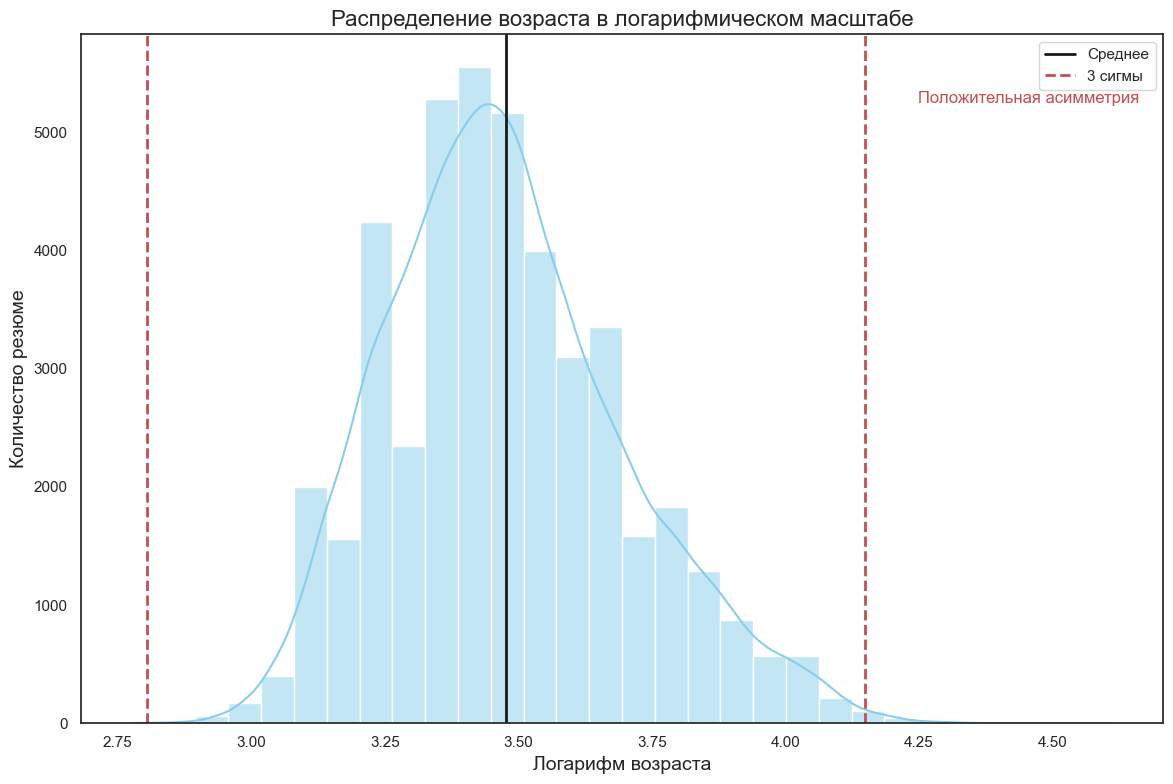

In [309]:
# ваш код здесь
# Преобразование возраста в логарифмический масштаб
# Добавим 1, чтобы избежать логарифма от нуля, если возраст может быть 0
df['log_age'] = np.log(df['Возраст'] + 1)

# Построение гистограммы
plt.figure(figsize=(12, 8))
histplot = sns.histplot(df['log_age'], bins=30, kde=True, color='skyblue')

# Добавление линий среднего и трех сигм
mean_log_age = df['log_age'].mean()
std_log_age = df['log_age'].std()

plt.axvline(mean_log_age, color='k', lw=2, label='Среднее')
plt.axvline(mean_log_age + 3*std_log_age, color='r', lw=2, linestyle='--', label='3 сигмы')
plt.axvline(mean_log_age - 3*std_log_age, color='r', lw=2, linestyle='--')

# Добавление заголовка и легенды
plt.title('Распределение возраста в логарифмическом масштабе', fontsize=16)
plt.xlabel('Логарифм возраста', fontsize=14)
plt.ylabel('Количество резюме', fontsize=14)
plt.legend()

# Комментарий об асимметрии
plt.text(mean_log_age + 3*std_log_age + 0.1, plt.ylim()[1]*0.9, 'Положительная асимметрия', color='r')

# Отображение графика
plt.tight_layout()
plt.show()

In [310]:
# Вычисление z-отклонений на логарифмическом масштабе
df['z_log_age'] = (df['log_age'] - mean_log_age) / std_log_age

# Определение границы выбросов (4 сигмы вправо)
threshold = 4
condition_outliers = df['z_log_age'] > threshold

# Выделение выбросов
outliers = df[condition_outliers]
print(f"Количество выбросов: {outliers.shape[0]}")

# Удаление выбросов из данных
df = df[~condition_outliers]
print(f"Количество записей после удаления выбросов: {df.shape[0]}")

# Вывод таблицы с выбросами
outliers_table = outliers[['Возраст', 'Опыт работы (месяц)', 'ЗП (руб)', 'Последнее/нынешнее место работы', 'Последняя/нынешняя должность']]
print("Таблица с выбросами:")
outliers_table

Количество выбросов: 1
Количество записей после удаления выбросов: 44309
Таблица с выбросами:


Возраст  Опыт работы (месяц)  ЗП (руб) Последнее/нынешнее место работы  \
33654      100                 30.0   60000.0                       Freelance   

      Последняя/нынешняя должность  
33654         Frontend-разработчик

ваш коммментарий здесь

Анализ:

Асимметрия распределения:

    Положительная асимметрия: Логарифмическое распределение возрастов имеет длинный хвост вправо, что означает наличие нескольких резюме с очень высоким возрастом.

Выбросы:

    Возраст: Соискатели с возрастом существенно превышающим 60 лет.
    Заработная плата: В некоторых выбросах зарплата достигает 120,000 руб., что может быть ошибкой или отражать особые позиции.
    Опыт работы: Некоторые резюме могут содержать чрезмерно высокий опыт работы (например, 600 месяцев = 50 лет), что нелогично.

Выводы:

    Аномалии в данных свидетельствуют о необходимости дополнительной проверки и очистки данных.
    Высокий возраст может быть нехарактерным для текущего рынка труда, особенно если это не специализированные позиции.